In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np

# Load the dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# If necessary, convert the date column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Shift the price column to create the target variable
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Define X (features) and y (target)
features_df = df.drop(['Timestamp', 'Close', 'target'], axis=1)
X = features_df.values
y = df['target'].values

# Define the random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Define the Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=1000)

# Find relevant features
feat_selector.fit(X, y)


# Check confirmed features
features_bool = np.array(feat_selector.support_)
features = np.array(features_df.columns)
confirmed = features[features_bool]
print('Confirmed Features:', confirmed)

# Check tentative features
features_bool_weak = np.array(feat_selector.support_weak_)
tentative = features[features_bool_weak]
print('Tentative Features:', tentative)

# Transform the dataset
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	2 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	3 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	4 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	5 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	6 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	7 / 1000
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	8 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	9 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	10 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	11 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	12 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	13 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	14 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	15 / 1000
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	16 / 1000
Confirmed: 	0
Tentative: 	8

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from boruta import BorutaPy
import numpy as np

# Load the dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# If necessary, convert the date column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Shift the price column to create the target variable
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Define X (features) and y (target)
features_df = df.drop(['Timestamp', 'Close', 'target'], axis=1)
X = features_df.values
y = df['target'].values

# Define the random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Boruta feature selection
feat_selector_boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector_boruta.fit(X, y)
boruta_support = feat_selector_boruta.support_

# RFE feature selection
selector_rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
selector_rfe.fit(X, y)
rfe_support = selector_rfe.support_

# SelectFromModel
selector_sfm = SelectFromModel(rf)
selector_sfm.fit(X, y)
sfm_support = selector_sfm.get_support()

# Combine the three feature selectors
selected_features = pd.DataFrame({
    'boruta': boruta_support,
    'rfe': rfe_support,
    'sfm': sfm_support,
}, index=features_df.columns)

# Print the selected features from each method
print("Features selected by Boruta: ", features_df.columns[boruta_support])
print("Features selected by RFE: ", features_df.columns[rfe_support])
print("Features selected by SelectFromModel: ", features_df.columns[sfm_support])

# Use majority voting to decide whether to keep a feature
selected_features['votes'] = selected_features.sum(axis=1)
features_to_keep = selected_features[selected_features['votes'] >= 2].index

print('Features to keep:', features_to_keep)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	91
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	83
I

## Try the model with these 'Features to keep':

2416 604
Epoch 1/30
49/49 [==============================] - 8s 95ms/step - loss: 0.0152 - val_loss: 0.0535 - lr: 2.3203e-04
Epoch 2/30
49/49 [==============================] - 4s 83ms/step - loss: 0.0059 - val_loss: 0.0128 - lr: 2.3203e-04
Epoch 3/30
49/49 [==============================] - 4s 85ms/step - loss: 0.0038 - val_loss: 0.0084 - lr: 2.3203e-04
Epoch 4/30
49/49 [==============================] - 4s 84ms/step - loss: 0.0028 - val_loss: 0.0059 - lr: 2.3203e-04
Epoch 5/30
49/49 [==============================] - 4s 84ms/step - loss: 0.0020 - val_loss: 0.0058 - lr: 2.3203e-04
Epoch 6/30
49/49 [==============================] - 4s 84ms/step - loss: 0.0016 - val_loss: 0.0045 - lr: 2.3203e-04
Epoch 7/30
49/49 [==============================] - 4s 85ms/step - loss: 0.0012 - val_loss: 0.0043 - lr: 2.3203e-04
Epoch 8/30
49/49 [==============================] - 4s 84ms/step - loss: 9.7343e-04 - val_loss: 0.0039 - lr: 2.3203e-04
Epoch 9/30
49/49 [==============================] - 4s 84ms

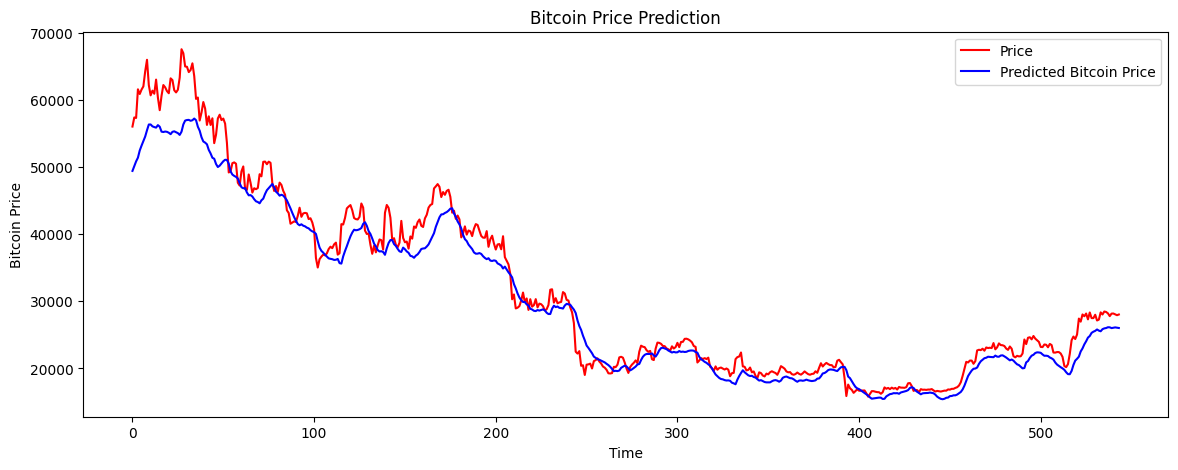

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Selected features according to the feature selection
selected_features = ['volume_adi', 'volume_em', 'volatility_kcp', 'volatility_ui',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'momentum_wr',
       'momentum_roc', 'others_dlr', 'Close'] #'Close'

# Filter out the other columns
df = df[selected_features]

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, :])  # Except 'Close'
    y_train.append(train_data[i, -1])  # 'Close' column

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=194, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2589961418221739))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00023202631462399754), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=39, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = test.iloc[60:]['Close'].values

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])  # Except 'Close'

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Check the model's prediction
predictions = model.predict(X_test)

# Now you can inverse_transform your predictions
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], test_data.shape[1]-1)), predictions), axis=1))[:, -1]

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()

# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2416 604
Epoch 1/30
49/49 [==============================] - 7s 91ms/step - loss: 0.0086 - val_loss: 0.0100 - lr: 2.3203e-04
Epoch 2/30
49/49 [==============================] - 4s 78ms/step - loss: 0.0037 - val_loss: 0.0080 - lr: 2.3203e-04
Epoch 3/30
49/49 [==============================] - 4s 79ms/step - loss: 0.0022 - val_loss: 0.0054 - lr: 2.3203e-04
Epoch 4/30
49/49 [==============================] - 4s 80ms/step - loss: 0.0016 - val_loss: 0.0062 - lr: 2.3203e-04
Epoch 5/30
49/49 [==============================] - 4s 79ms/step - loss: 0.0012 - val_loss: 0.0047 - lr: 2.3203e-04
Epoch 6/30
49/49 [==============================] - 4s 79ms/step - loss: 9.4707e-04 - val_loss: 0.0050 - lr: 2.3203e-04
Epoch 7/30
49/49 [==============================] - 4s 79ms/step - loss: 7.1219e-04 - val_loss: 0.0059 - lr: 2.3203e-04
Epoch 8/30
49/49 [==============================] - 4s 80ms/step - loss: 7.1042e-04 - val_loss: 0.0055 - lr: 2.3203e-04
Epoch 9/30
49/49 [==============================] -

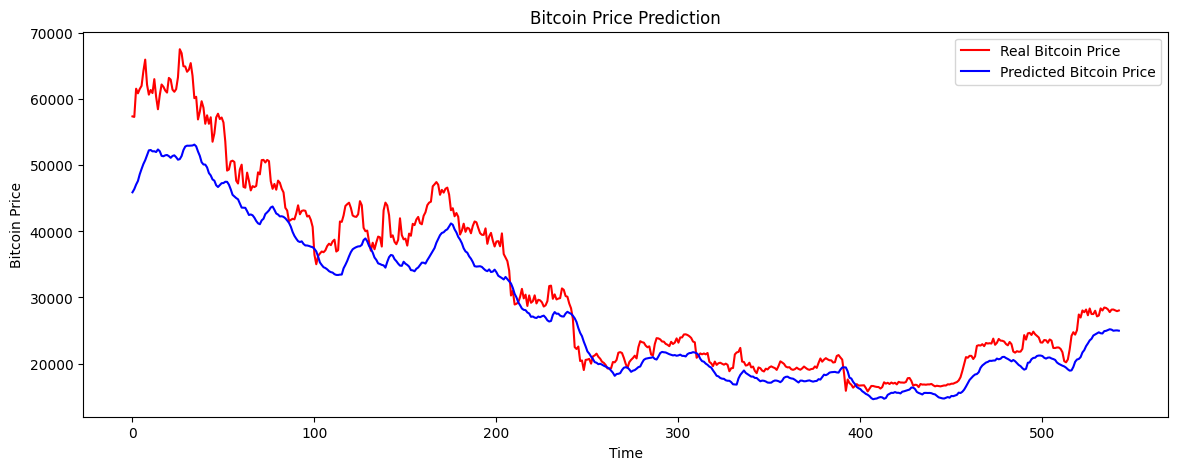

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Selected features according to the feature selection
selected_features = ['volume_adi', 'volume_em', 'volatility_kcp', 'volatility_ui',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'momentum_wr',
       'momentum_roc', 'others_dlr', 'Close']

# Filter out the other columns
df = df[selected_features]

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)-1):  # Subtract 1 because we're predicting the next day's close price
    X_train.append(train_data[i-60:i, :])  # The current day's data
    y_train.append(train_data[i+1, -1])  # The next day's closing price

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=194, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2589961418221739))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00023202631462399754), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=39, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = test.iloc[61:]['Close'].values

for i in range(60, len(test_data)-1):  # Subtract 1 because we're predicting the next day's close price
    X_test.append(test_data[i-60:i, :])  # The current day's data

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Check the model's prediction
predictions = model.predict(X_test)

# Now you can inverse_transform your predictions
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], test_data.shape[1]-1)), predictions), axis=1))[:, -1]

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()

# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


In [ ]:
## Try predicting price rise or fall rather than actual price

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')



# Add 'Target' column that indicates whether the price rises the next day
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)  # Note: The last value in 'Target' will be NaN

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)-1]  # Exclude the last row in the test set because its 'Target' is NaN
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)-1):  # Subtract 1 because we're predicting the next day's target
    X_train.append(train_data[i-60:i, :])  # The current day's data
    y_train.append(train_data[i+1, -1])  # The next day's target

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=194, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2589961418221739))
model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00023202631462399754), loss='binary_crossentropy')  # Use binary cross-entropy for binary classification

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=39, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = test.iloc[60:-1]['Target'].values  # Subtract 1 because we're predicting the next day's target

for i in range(60, len(test_data)-1):  # Subtract 1 because we're predicting the next day's target
    X_test.append(test_data[i-60:i, :])  # The current day's data

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Check the model's prediction
predictions = model.predict(X_test)

# Convert the probabilities to binary outputs
predictions_binary = (predictions > 0.5).astype(int)

# Calculate classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test Accuracy:', accuracy_score(y_test, predictions_binary))
print('Test Precision:', precision_score(y_test, predictions_binary))
print('Test Recall:', recall_score(y_test, predictions_binary))
print('Test F1 Score:', f1_score(y_test, predictions_binary))


2416 603
Epoch 1/30
49/49 [==============================] - 8s 107ms/step - loss: 0.6976 - val_loss: 0.7223 - lr: 2.3203e-04
Epoch 2/30
49/49 [==============================] - 5s 96ms/step - loss: 0.6934 - val_loss: 0.7203 - lr: 2.3203e-04
Epoch 3/30
49/49 [==============================] - 5s 98ms/step - loss: 0.6930 - val_loss: 0.7052 - lr: 2.3203e-04
Epoch 4/30
49/49 [==============================] - 5s 98ms/step - loss: 0.6868 - val_loss: 0.7424 - lr: 2.3203e-04
Epoch 5/30
49/49 [==============================] - 5s 99ms/step - loss: 0.6946 - val_loss: 0.7143 - lr: 2.3203e-04
Epoch 6/30
49/49 [==============================] - 5s 98ms/step - loss: 0.6844 - val_loss: 0.7337 - lr: 2.3203e-04
Epoch 7/30
49/49 [==============================] - 5s 98ms/step - loss: 0.6821 - val_loss: 0.7584 - lr: 2.3203e-04
Epoch 8/30
49/49 [==============================] - 5s 97ms/step - loss: 0.6828 - val_loss: 0.7252 - lr: 2.3203e-04
Epoch 9/30
49/49 [==============================] - 5s 98ms/st

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
